# Data Preprocessing

From EDA

- `BUI`-`DMC`, `BUI-DC` and `FWI`-`ISI` has high correlation i.e. more than `0.9`.
- Outliers need not be treated.
- `day` should be treated as `categorical` and not `ordinal`.

GOALS

1. Drop feature with high correlation.
2. Encoding categorical data.
3. Selecting Target variable for **regression** and **classification**.
   1. Splitting into train and test set.
   2. Feature Scaling.
   3. Saving dataset as `train.csv` and `test.csv`

TO TRY

- Pipeline from `sklearn`.


# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid", font_scale=1.4)


# Importing Data


In [2]:
dataset = pd.read_csv("./../data/Cleaned_Dataset.csv")
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [3]:
df = dataset.drop(["year"], axis=1)
df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


# Dealing with high correlation


In [4]:
def plot_corr(corr_data):
    plt.figure(figsize=(13, 9))
    mask = np.triu(np.ones_like(corr_data))
    ax = sns.heatmap(corr_data, mask=mask, fmt=".2f", annot=True, linewidths=0.5, cmap="PuOr", center=0)
    return ax


<AxesSubplot:>

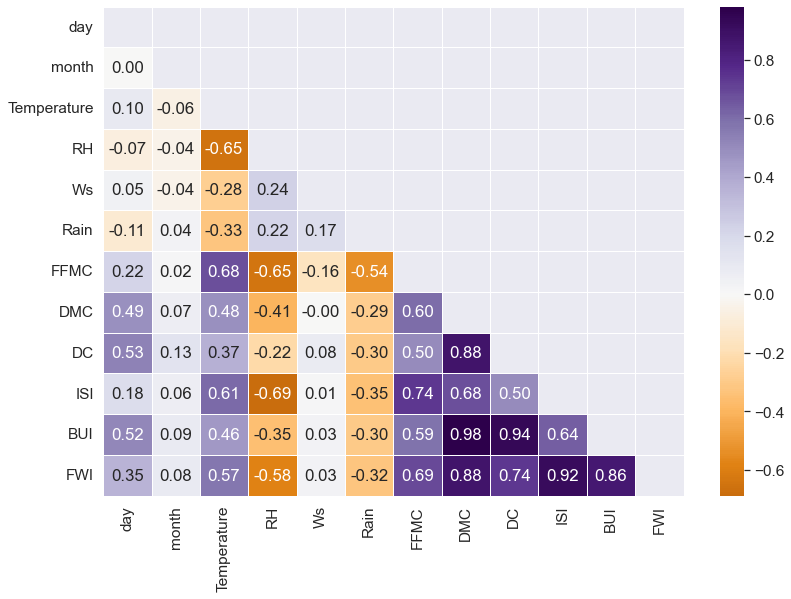

In [5]:
plot_corr(df.corr())


## Variance Inflation Factor


In [6]:
variable = df.select_dtypes(exclude="O")
variable.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


Data preprocessing steps should be applied for calculating `vif` also as it would be applied on normal model. [Refernce](https://stats.stackexchange.com/questions/461141/is-it-advisable-to-impute-missing-values-and-scale-features-before-computing-the)


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


def calc_vif(data):
    sc = StandardScaler()
    scaled_data = sc.fit_transform(data)
    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]
    vif_df["feature"] = data.columns
    return vif_df.sort_values("VIF", ascending=False).reset_index(drop=True)


In [8]:
calc_vif(variable)


,VIF,feature
0,171.252436,BUI
1,76.361945,DMC
2,40.484087,FWI
3,25.287843,DC
4,23.216773,ISI
5,4.127608,FFMC
6,2.783453,RH
7,2.421438,Temperature
8,1.550481,Rain
9,1.486174,day


OBSERVATION

- `BUI`-`DMC`, `BUI-DC` and `FWI`-`ISI` has high correlation i.e. more than `0.9`.
- Most feature has high `vif`.

TODO

- Remove highly correlated feature with high `vif` and check `vif` again.


In [9]:
calc_vif(variable.drop(["BUI", "FWI"], axis=1))  # After BUI, FWI and ISI had highest VIF


,VIF,feature
0,6.880180,DMC
1,5.484516,DC
2,3.961094,ISI
3,3.665749,FFMC
4,2.750376,RH
5,2.417741,Temperature
6,1.542386,Rain
7,1.483046,day
8,1.301319,Ws
9,1.084039,month


OBSERVATION

- Dropping `BUI` and `FWI` decreased `VIF` of all feature below 10.
- Correlation of feature also pointed towards same conclusion.

TODO

- Drop `BUI` and `FWI` from dataset.


In [10]:
no_multi_col_df = df.drop(["BUI", "FWI"], axis=1)
no_multi_col_df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire,Bejaia


# Encoding Categorical Data

- Label Encoding on `Classes` and `Region` (`Region` will have only 1s & 0s, or Ordinal Encoding)
- One Hot Encoding of `day`
- Ordinal Encoding of `month` where value are in such order $8>7>6>9$

TO TRY

- Encoders i.e. sklearn method which can give output in `np.array`


In [11]:
no_multi_col_df.nunique()


day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
Classes          2
Region           2
dtype: int64

## `sklearn` Method

**`LabelEncoder`, `OrdinalEncoder`, `OneHotEncoder`**  
OneHotEncoder will convert `pandas.DataFrame` to `numpy.array`


In [12]:
np_df = no_multi_col_df.copy()
np_df.head()
# can directly use .values() to convert into array.
# and then perform encoding.


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire,Bejaia


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  # cannot be passed into ColumnTransformer
np.unique(label_encoder.fit_transform(np_df["Classes"]), return_counts=True), label_encoder.classes_


((array([0, 1]), array([138, 106], dtype=int64)),
 array(['fire', 'not fire'], dtype=object))

In [14]:
# ordinal encoder does not take categories for numeric type to define sequence
# if values would be string then categories can be use to define the sequence order for the values
np_df["month"] = np_df["month"].map({6: 1, 7: 2, 8: 3, 9: 0})
np_df["month"].value_counts()


2    62
3    62
1    60
0    60
Name: month, dtype: int64

In [15]:
np_df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1,1,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire,Bejaia
1,2,1,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
2,3,1,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire,Bejaia
3,4,1,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire,Bejaia
4,5,1,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire,Bejaia


In [16]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# ? in case of pandas we can pass column name/label or index and in numpy we can define index of columns
# ct=ColumnTransformer(transformers=[('label_encoder',OneHotEncoder(),['day'])],remainder='passthrough')

ct = ColumnTransformer(
    transformers=[
        ("ohe_classes", OneHotEncoder(sparse=False, drop="if_binary"), [-2]),  # adds encoded value at first #* Classes
        ("ordinal_encoder", OrdinalEncoder(), [-1]),  # adds encoded value at first  #* Region
        ("ohe_day", OneHotEncoder(sparse=False, drop="first"), [0]),  # adds encoded value at first #* day
    ],
    remainder="passthrough",
)
#! ct will add encoded values in the same sequence as seen in transformer
#! i.e. [ohe_classes_transformed_values, ordinal_encoder_transformed_values, ohe_day_transformed_values, other_features]

# np_df = ct.fit_transform(np_df)
# np_df.shape, np_df
np_data = ct.fit_transform(np_df)


In [17]:
ct.transformers_, ct.named_transformers_


([('ohe_classes', OneHotEncoder(drop='if_binary', sparse=False), [-2]),
  ('ordinal_encoder', OrdinalEncoder(), [-1]),
  ('ohe_day', OneHotEncoder(drop='first', sparse=False), [0]),
  ('remainder', 'passthrough', [1, 2, 3, 4, 5, 6, 7, 8, 9])],
 {'ohe_classes': OneHotEncoder(drop='if_binary', sparse=False),
  'ordinal_encoder': OrdinalEncoder(),
  'ohe_day': OneHotEncoder(drop='first', sparse=False),
  'remainder': 'passthrough'})

In [18]:
ct.named_transformers_["ohe_classes"].categories_, ct.named_transformers_[
    "ordinal_encoder"
].categories_, ct.named_transformers_["ohe_day"].categories_


([array(['fire', 'not fire'], dtype=object)],
 [array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)],
 [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        dtype=int64)])

In [194]:
np_df.iloc[[1, 128]]


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
1,2,1,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
128,7,1,35,44,17,0.2,85.6,9.9,28.9,5.4,fire,Sidi-Bel Abbes


In [195]:
np_data[[1, 128]]  # 2nd and 129th row


array([[ 1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        29. , 61. , 13. ,  1.3, 64.4,  4.1,  7.6,  1. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        35. , 44. , 17. ,  0.2, 85.6,  9.9, 28.9,  5.4]])

In [196]:
np_data[[1, 128], 0]  # 0 is Classes


array([1., 0.])

In [197]:
np_data[[1, 128], 1]  # 1 is region


array([0., 1.])

In [198]:
np_data[[1, 128], 2:32]  # 2-32 is day


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [199]:
np_data[[1, 128], 32]  # 32 is month


array([1., 1.])

In [200]:
np_data[[1, 128], 33]  # 33 is temperature


array([29., 35.])

OBSERVATION

|  Index | Data/Column |
| -----: | :---------- |
|    `0` | Classes     |
|    `1` | Region      |
| `2-31` | day         |
|   `32` | Month       |
|   `33` | Temperature |


CONCLUSION

**PROS**

- mapping of feature will be retain in object.
- will be able to use `fit`, `transform` and `inverse_transform` i.e. to convert new data back and forth from encoding to decoding.

**CONS**

- Label for each column/feature will be lost, i.e. it will be `nd` array.
- no control over `OrdinalEncoder` sequence for `numeric` data but, order can be define for `string` data type.


# Deciding Target Variable

- Classification will be for `Classes`. `[0]`
- Regression will be for `Temperature`. `[33]`

NOTE

- If target for regression has been decided prior, then `vif` and `corr` would have affect for example if `FWI` was supposed to be predicted then it won't be included for `vif` and `corr`.


In [201]:
X_class = np_data[:, 1:]
y_class = np_data[:, [0]]

X_reg = np.concatenate((np_data[:, 0:33], np_data[:, 34:]), axis=1)
y_reg = np_data[:, [33]]


In [202]:
X_class.shape, y_class.shape, X_reg.shape, y_reg.shape


((244, 40), (244, 1), (244, 40), (244, 1))

## Cross Verifying the data


In [203]:
np.unique(y_class, return_counts=True), np_df["Classes"].value_counts()


((array([0., 1.]), array([138, 106], dtype=int64)),
 fire        138
 not fire    106
 Name: Classes, dtype: int64)

In [204]:
np.all(y_reg == np_df[["Temperature"]])


True

OBSERVATION

- Data has been transformed
- Divided data into feature and target


# Splitting into Training and Testing Set


In [205]:
from sklearn.model_selection import train_test_split

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.15, random_state=64
)
y_class_train.shape, y_class_test.shape


((207, 1), (37, 1))

In [206]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=64)
y_reg_train.shape, y_reg_test.shape


((195, 1), (49, 1))

# Feature Scaling

- Need to do use Robust Scaler.
  - Robust Scaler is due to the fact there are some outlier in dataset which are in permissible range hence can not be treated (clapped, drop, transform).
- Scaling will be done on numerical data and not on encoded/categorical data


In [207]:
from sklearn.preprocessing import RobustScaler

class_robust_scale = RobustScaler()
reg_robust_scale = RobustScaler()


## Classification Data


In [208]:
X_class_train_scaled = X_class_train
X_class_test_scaled = X_class_test


In [209]:
np_df.iloc[[100]]


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
100,9,0,30,77,15,1.0,56.1,2.1,8.4,0.7,not fire,Bejaia


In [210]:
X_class_train[1, 32:]
# ? 32 as Classes was at 0th index and now iat's Target variable so index got left shifted by 1


array([30. , 77. , 15. ,  1. , 56.1,  2.1,  8.4,  0.7])

In [211]:
X_class_train_scaled[:, 32:] = class_robust_scale.fit_transform(X_class_train_scaled[:, 32:])
X_class_test_scaled[:, 32:] = class_robust_scale.transform(X_class_test_scaled[:, 32:])


In [212]:
X_class_train_scaled[1]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.4       ,  0.66666667,  0.        ,
        1.81818182, -1.74132492, -0.67164179, -0.492569  , -0.50847458])

## Regression Data


In [213]:
X_reg_train_scaled = X_reg_train
X_reg_test_scaled = X_reg_test


In [214]:
np_df.iloc[[139]]


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
139,18,1,33,62,10,8.7,65.5,4.6,8.3,0.9,not fire,Sidi-Bel Abbes


In [215]:
X_reg_train[1, 33:]
# ? 33 as no starting column is shifted


array([63. , 15. ,  0. , 87. , 19. , 85.1,  5.9])

In [216]:
X_reg_train_scaled[:, 33:] = reg_robust_scale.fit_transform(X_reg_train_scaled[:, 33:])
X_reg_test_scaled[:, 33:] = reg_robust_scale.transform(X_reg_test_scaled[:, 33:])


In [228]:
X_reg_train_scaled[1]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.        , 0.        , 0.        ,
       0.        , 0.228739  , 0.5620438 , 1.04492188, 0.40336134])

OBSERVATION

- Data is scaled for both classification and regression
- It's better to decide target variable before encoding which can save confusion of index later on.


# Saving Data, Encoders & Scalers.


## Data


In [218]:
np.savez(
    "./../data/Classification_data",
    features_train=X_class_train_scaled,
    targets_train=y_class_train,
    features_test=X_class_test_scaled,
    targets_test=y_class_test,
)


In [219]:
[i for i in np.load("./../data/Classification_data.npz").keys()]


['features_train', 'targets_train', 'features_test', 'targets_test']

In [220]:
np.savez(
    "./../data/Regression_data",
    features_train=X_reg_train_scaled,
    targets_train=y_reg_train,
    features_test=X_reg_test_scaled,
    targets_test=y_reg_test,
)


In [221]:
[i for i in np.load("./../data/Regression_data.npz").keys()]


['features_train', 'targets_train', 'features_test', 'targets_test']

## Encoder and Scaler


In [222]:
import pickle
import os


def serialize_save(obj, obj_type, file_name):
    if not os.path.isdir(f"./../{obj_type}"):
        os.mkdir(f"./../{obj_type}")
    with open(f"./../{obj_type}/{file_name}.pickle", "wb") as f:
        pickle.dump(obj, f)
    return f"{file_name}.pickle saved at ./../{obj_type}"


In [223]:
class_scaler = {"class_scaler": class_robust_scale, "meta": "Apply transformation from 32nd index onwards"}
reg_scaler = {"reg_scaler": reg_robust_scale, "meta": "Apply transformation from 33rd index onwards"}


In [224]:
serialize_save(class_scaler, "scaler", "Classification_Robust_scaler")


'Classification_Robust_scaler.pickle saved at ./../scaler'

In [225]:
serialize_save(reg_scaler, "scaler", "Regression_Robust_scaler")


'Regression_Robust_scaler.pickle saved at ./../scaler'

In [226]:
serialize_save(ct, "encoder", "Encoder")


'Encoder.pickle saved at ./../encoder'

# Scaler Value Chart

CLASSIFICATION

|  Index | Column/Label               |
| -----: | :------------------------- |
|    `0` | Region                     |
| `1-30` | day                        |
|   `31` | month                      |
|   `32` | onwards needs to be scaled |

REGRESSION

|  Index | Column/Label               |
| -----: | :------------------------- |
|    `0` | Classes                    |
|    `1` | Region                     |
| `2-31` | day                        |
|   `32` | month                      |
|   `33` | onwards needs to be scaled |


# Encoded Value Chart

**`month`**

| `month` | `mapped month` | `month name` |
| :------ | :------------- | :----------- |
| 9       | 0              | September    |
| 6       | 1              | June         |
| 7       | 2              | July         |
| 8       | 3              | August       |

**`Region`**

| `Region`       | `mapped Region` |
| :------------- | :-------------- |
| Bejaia         | 0               |
| Sidi-Bel Abbes | 1               |

**`Classes`**

| `Classes` | `mapped Classes` |
| :-------- | :--------------- |
| fire      | 0                |
| not fire  | 1                |

**`day`** is one-hot encoded with length of `30` i.e. day 1 is dropped which means 1 will be represented by 30 $0$.


# CONCLUSION

- Select Target variables before Encoding and Scaling.
- Encoding and Scaling can be done with ColumnTransformer.
- ColumnTransformer (Encoding & Scaling) can be passed to Pipeline.
- For fitting Model we need to pass raw data i.e. in Pipeline we need to pass raw data which will be scaled and encoded and then finally will be fitted.
  - If same transformed data will be passed in Pipeline for fit then it will be transformed again.
- In data preprocessing, we take care of missing value, outliers and decide about scaler and encoder variables and which method to apply.
  - If missing value & outliers are there and are taken care of, we can do EDA for checking any other insights.
- In Final Pipeline all the steps of encoding & scaling will be reapplied.
